In [650]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

$\textbf{Part 1}$ \
The normal distribution, described by the probability density function ${f(x)={\cfrac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\cfrac {1}{2}} \Big( {\cfrac {x-\mu }{\sigma }}\Big)^{2}}}$, is a continuous, monovariate \
probability distribution. $\mu$ is the mean/expectation value of the distribution, $\sigma$ represents the standard deviation of the function, and \
the variance is given by $\sigma ^2$.
The normal distribution is often used as a way to analyze and describe how spread out numbers are from \
each other. The 'standard' normal distribution is given by taking $\sigma ^2 = 1$, and $\mu = 0$. Below is an example of a normal distribution with \
$\mu = 1$ and $\sigma = 3.5$.

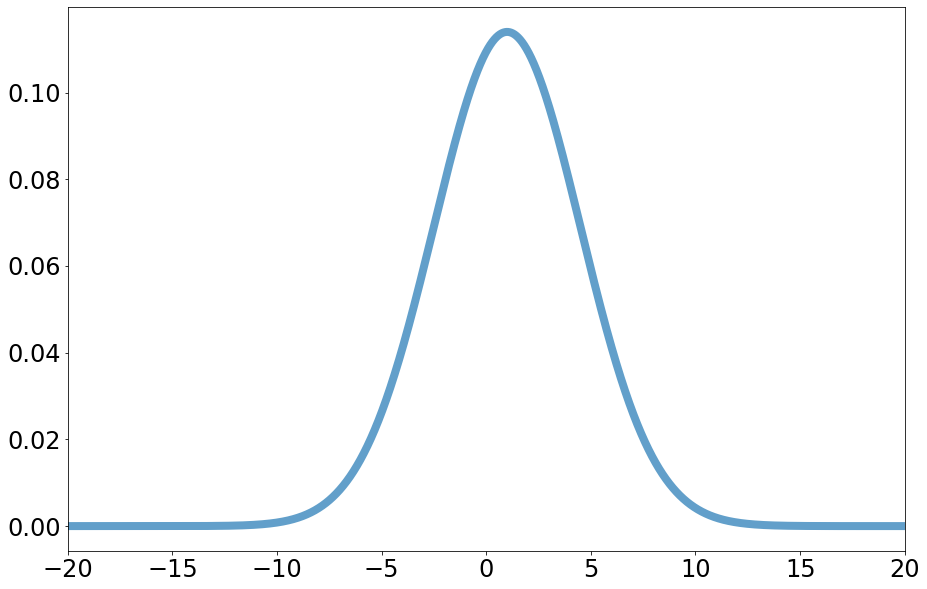

In [651]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
plt.xlim([-20,20])
x = np.linspace(-20,20,10000)
ax.plot(x,stats.norm.pdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
plt.show()

The cumulative distribution function is used to represent the probability that any value will be less than or equal to a chosen x. This is often done \
by integrating a probability density from negative infinity to the aforementioned chosen value of x. Below is a graph of the cumulative distribution \
function of the normal distribution function shown directly above, with the same parameters. In this case, since it is a cumulative function of the \
normal distribution, it can be simply written as ${\displaystyle F(x)=\Phi \left({\frac {x-\mu }{\sigma }}\right)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right]}$, where ${\displaystyle \Phi (x)={\frac {1}{2}}\left[1+\operatorname {erf} \left({\frac {x}{\sqrt {2}}}\right)\right]}$


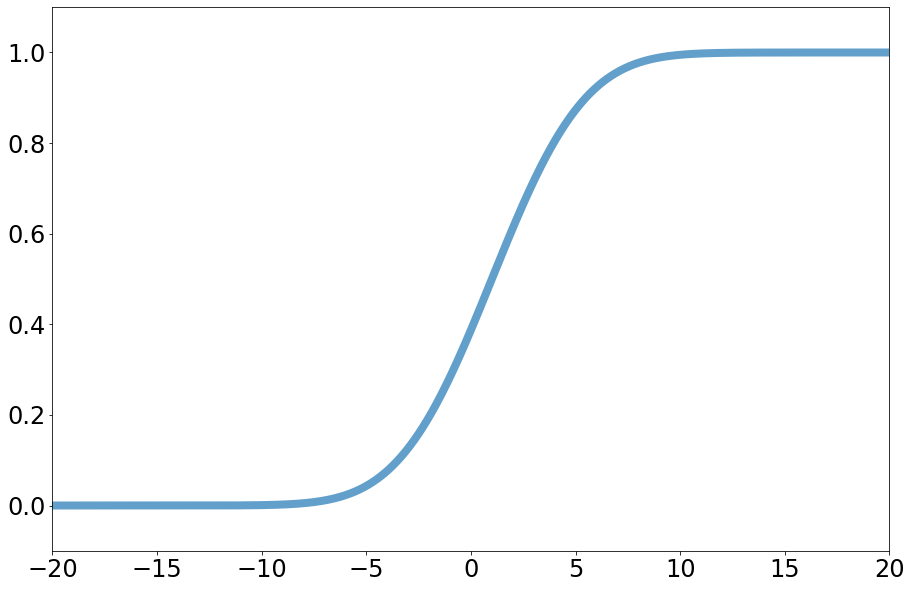

In [652]:
fig, ax = plt.subplots(1, 1)
#ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-20,20])
plt.ylim([-0.1,1.1])
x = np.linspace(-20,20,10000)
ax.plot(x,stats.norm.cdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
plt.show()

For the cumulative distribution function of the normal distribution, there are resources known as 'z-tables' to make approximating probabilities and \
sigma values much easier. Using the cumulative table found at https://en.wikipedia.org/wiki/Standard_normal_table as a reference, it is evident that \
for a value of z that is 2 higher than the mean, the probability of a number being less than that z is 0.97725. Below, that approximation will be \
checked, and an associated sigma value will be found. Sigma, in this case, can be thought of as a measure of the maximum number of standard deviations \
a chosen number may be expected to have. (Is that sigma explaination good enough? I'm not quite sure how to describe it)

In [653]:
#Subtract the mean and divide by the standard deviation
#To get z in terms of sigma
y = stats.norm.cdf(7+1,loc=1,scale=3.5)
print("The probability of a number having value less than or equal to 7 for the above cumulative distribution function is " + str(y)) 
z = stats.norm.ppf(0.97724986, loc=1,scale=3.5)
sigma = (z - 1)/(3.5)
print("The sigma associated with the probability above is " + str(sigma) + ". Since the chosen number was 7, which cooresponds to 2 multiplied \nby the standard deviation, a sigma value of 2 is expected.")

The probability of a number having value less than or equal to 7 for the above cumulative distribution function is 0.9772498680518208
The sigma associated with the probability above is 1.999999850867282. Since the chosen number was 7, which cooresponds to 2 multiplied 
by the standard deviation, a sigma value of 2 is expected.


$\textbf{Part 2}$ \
The exponential probability density function is described by the equation $ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$, where $\lambda > 0$ is the parameter of the distribution. \
An exponential distribution is characterized primarily by its memorylessness (which will be expanded upon below), and its exponential shape. For an \
exponential distribution, the mean is equal to the standard deviation i.e. $\mu = \sigma = \cfrac{1}{\lambda}$. In the following image, both an analytic and histogram realization \
of an exponential distribution will be overlayed. The distribution is normalized to start at x = 1, and has a standard deviation of 3.5.

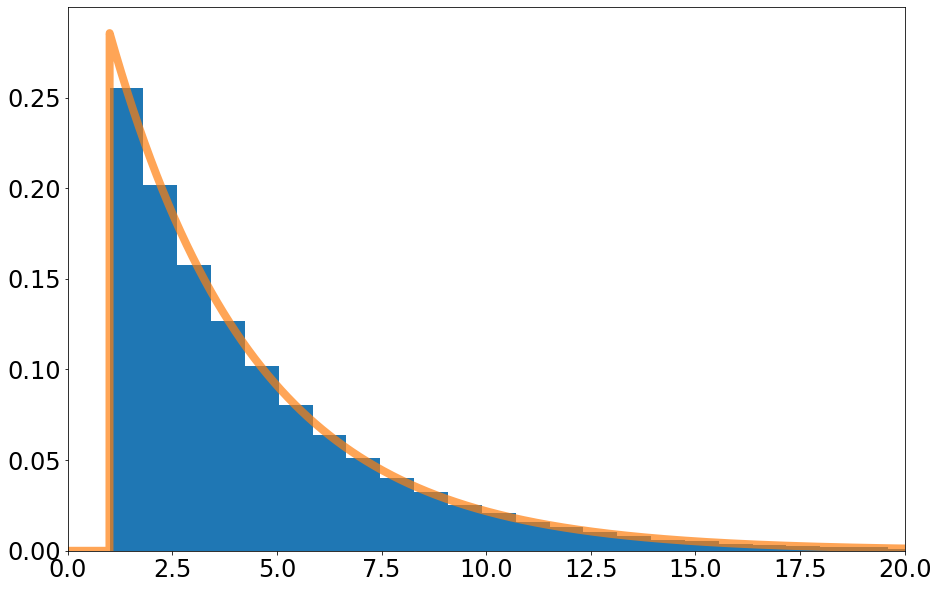

In [654]:
y = stats.expon.rvs(loc=1, scale=3.5, size=100000)
fig, ax = plt.subplots(1, 1)
ax.hist(y, 50, density=True, histtype='stepfilled')
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(-20,20,10000)
ax.plot(x, stats.expon.pdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
plt.show()

Below, a log scale plot of the exponential density function is given, to provide more clarity to the edge cases with much smaller sample sizes. 

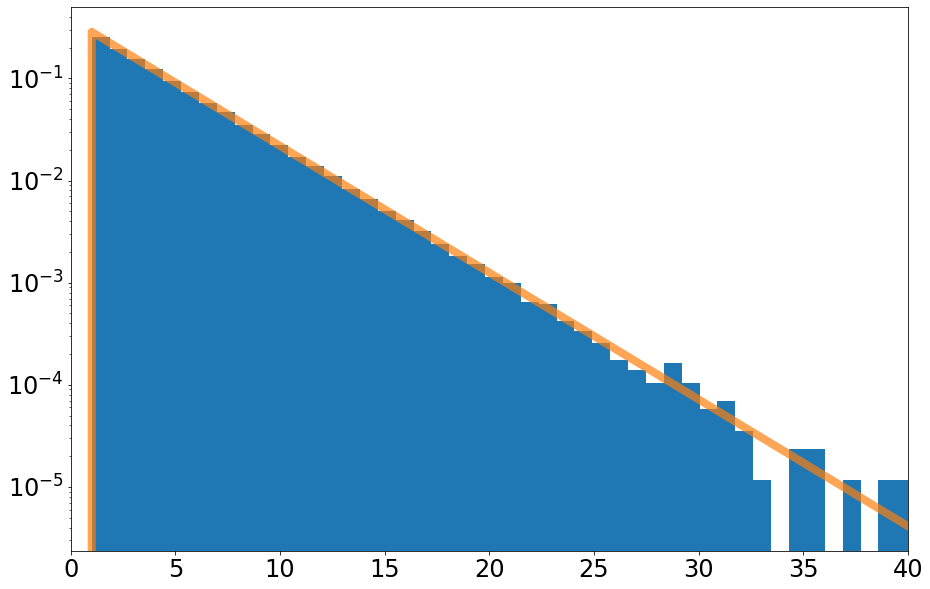

In [655]:
y = stats.expon.rvs(loc=1, scale=3.5, size=100000)
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(y, 50, density=True, histtype='stepfilled')
plt.tick_params(labelsize = 24)
plt.xlim([0,40])
x = np.linspace(0,40,10000)
ax.plot(x, stats.expon.pdf(x,loc = 1, scale = 3.5),linewidth = 8,alpha = 0.7)
plt.show()

The following image demonstrates the geometric interpretation of the memorylessness property of the exponential probability distribution function. \
Consider an initial exponential probability density function, which starts at height $\lambda$ and decreases according to $\lambda e^{-\lambda x}$. Some time 'x' later, take the \
remaining lifetime of the probability density function and rescale/normalize it so that its integrated probability density is equal to one. Now, if you \
simply shift the new curve x units back to the left, it is clear that the new, rescaled function is identical to the remainder of the original probability \
density function. 
It is in this way that the memoryless property of the exponential distribution is geometrically demonstrated - The distribution of \
the remaining
function is the same as the remaining portion of the original unconditional distribution.  

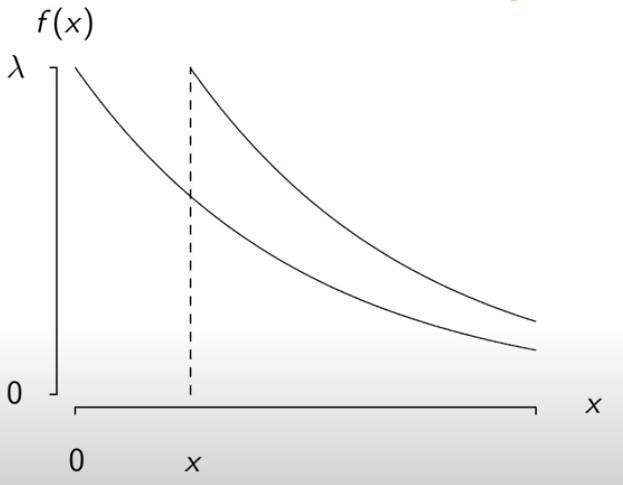

In [656]:
from IPython.display import Image
Image(filename='Capture2.PNG')

$\textbf{Part 3 & 4}$ \
Suppose we have measured a data point of value 5 after measuring background, signal-free data that fits an exponential probability distribution. We wish \
to calculate the probability that we would observe this value of 5 (or more extreme measurements), as well as find its associated sigma value. By performing \
a calculation using the integral of the nonzero portion of the exponential probability distribution up to the our chosen value of 5, using the aforementioned \
equation
$ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$, we produce 
the probability that our chosen 
value is from the background, signal-free data. In this case, it integrates \
nicely into 
$\int_{- \infty}^{8} \lambda e^{-\lambda x} = \int_{0}^{8} \lambda e^{-\lambda x} = \left[ -e^{-\lambda x}  \right] _0 ^x  = 1 - e^{-\lambda x}  = 1 - e^{-\lambda x},$ since $f(x;\lambda) = 0$ when $x < 0;$ For this exercise's sake, let's say the hypothetical \
data is normalized to start at x = 1 and a standard deviation of 3.5, as similarly modeled in Part 1 and Part 2. The probability of finding a data point of 5, or \
more extreme, 
is therefore equivalent to 1 minus the integrated probability density function, since we are interested in the probability of our value appearing \
from our chosen value to infinity, rather than negative infinity up to our chosen value.

In [657]:
std = 3.5
mean = stats.expon.mean(loc = 1, scale = std)
x = 1 - stats.expon.cdf(5, loc = 1, scale = std)
print("The probability of finding a point with value 5 (or more extreme) is " + str(x))

The probability of finding a point with value 5 (or more extreme) is 0.31890655732397044


The associated sigma value of such a measurement can also be calculated by the following.

In [658]:
z = stats.expon.ppf(1 - x, loc = 1, scale = std)
sigma =  ((z - mean)/(std))
print("The sigma value associated with a measurement of 5 is " + str(sigma))

The sigma value associated with a measurement of 5 is 0.14285714285714285


In [659]:
x1 = 1 - stats.expon.cdf(-3.5 + mean, loc = 1, scale = std)
x2 = 1 - stats.expon.cdf(-2.5 + mean, loc = 1, scale = std)
x3 = 1 - stats.expon.cdf(-1.5 + mean, loc = 1, scale = std)
z1 = stats.expon.ppf(1 - x1, loc = 1, scale = std)
z2 = stats.expon.ppf(1 - x2, loc = 1, scale = std)
z3 = stats.expon.ppf(1 - x3, loc = 1, scale = std)
sigma1 = (z1 - mean)/(std)
sigma2 = (z2 - mean)/(std)
sigma3 = (z3 - mean)/(std)
print(x1, x2, x3, sep=', ')
print("Increasing data point chosen by one leads to a probability decrease of " + str(x1 - x2))
print("Increasing data point chosen by one again leads to a probability decrease of " + str(x2 - x3))
print()
print(sigma1 , sigma2, sigma3, sep=', ')
print("Increasing data point chosen by one leads to a sigma increase of " + str(sigma2 - sigma1))
print("Increasing data point chosen by one again leads to a sigma increase of " + str(sigma3 - sigma2))

1.0, 0.751477293075286, 0.5647181220077593
Increasing data point chosen by one leads to a probability decrease of 0.248522706924714
Increasing data point chosen by one again leads to a probability decrease of 0.1867591710675267

-1.0, -0.7142857142857143, -0.4285714285714287
Increasing data point chosen by one leads to a sigma increase of 0.2857142857142857
Increasing data point chosen by one again leads to a sigma increase of 0.2857142857142856


In [660]:
x1 = 1- stats.expon.cdf(0 + mean, loc = 1, scale = std)
x2 = 1 - stats.expon.cdf(1 + mean, loc = 1, scale = std)
x3 = 1 - stats.expon.cdf(2 + mean, loc = 1, scale = std)
z1 = stats.expon.ppf(1 - x1, loc = 1, scale = std)
z2 = stats.expon.ppf(1 - x2, loc = 1, scale = std)
z3 = stats.expon.ppf(1 - x3, loc = 1, scale = std)
sigma1 = (z1 - mean)/(std)
sigma2 = (z2 - mean)/(std)
sigma3 = (z3 - mean)/(std)
print(x1, x2, x3, sep=', ')
print("Increasing data point chosen by one leads to a probability decrease of " + str(x1 - x2))
print("Increasing data point chosen by one again leads to a probability decrease of " + str(x2 - x3))
print()
print(sigma1 , sigma2, sigma3, sep=', ')
print("Decreasing data point chosen by one leads to a sigma increase of " + str(sigma2-sigma1))
print("Decreasing data point chosen by one again leads to a sigma increase of " + str(sigma3 - sigma2))

0.36787944117144233, 0.27645304662956427, 0.20774818714360088
Increasing data point chosen by one leads to a probability decrease of 0.09142639454187806
Increasing data point chosen by one again leads to a probability decrease of 0.06870485948596339

0.0, 0.285714285714286, 0.5714285714285712
Decreasing data point chosen by one leads to a sigma increase of 0.285714285714286
Decreasing data point chosen by one again leads to a sigma increase of 0.2857142857142852


As expected for an exponential probability distribution, the probability of finding a specific value or higher decreases rapidly at first, but then diminishes less \
and less as the chosen point moves away from the normalized location of the exponential probability distribution. (In this case, the location = 1 = mean - 3.5) \
As also shown above, the rate of change of the sigma value is constant for values higher and lower than the 
mean of the exponential probability 
distribution. \
Finally, the above information also confirms that the sigma value at the mean is 0.0, which is to be expected.

$\textbf{Part 4}$ \
The binomial distribution is given by the probability function ${\displaystyle f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}}$, where \
${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$ is the binomial coefficcient, also known as the $x^k$ term in the polynomial expansion of the binomial power $(1+x)^n$. \
The cumulative distribution function of the binomial distribution is given by 
${\displaystyle F(k;n,p)=\Pr(X\leq k)=\sum _{i=0}^{\lfloor k\rfloor }{n \choose i}p^{i}(1-p)^{n-i},}$, where $\lfloor k\rfloor$ \
is the greatest integer less than or equal to k.

In [661]:
#I'll throw in a few analytic and histogram plots of the binomial distribution, its cumulative distribution, and a logarithmic form of one
#(or maybe both) here before I submit it to our TA. Sorry that this portion was incomplete, I spaced on it. but wanted to make sure you had the
#rest to review regardless, given this section is mostly plot based